In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer


In [37]:
df=pd.read_csv("Resume_Data.csv",encoding='latin1')

In [38]:
df.head()

,Category,Resume
0,NaN,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [39]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â?¢ Proficient in MS office (...
958,Testing,â? Willingness to accept the challenges. â? ...
959,Testing,"PERSONAL SKILLS â?¢ Quick learner, â?¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [40]:
df['clean_resume']=" "

In [41]:
df.head()

,Category,Resume,clean_resume
0,NaN,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [42]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

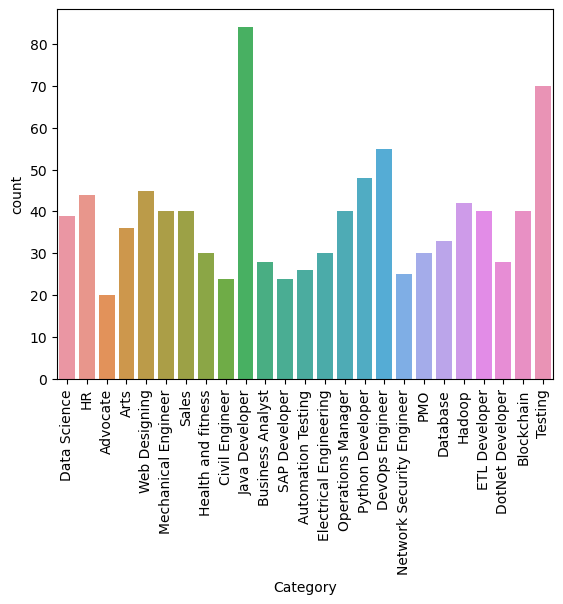

In [43]:
fig,ax=plt.subplots()
sns.countplot(x='Category',data=df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


In [44]:
df['Resume'][78]

'Education Details \n BBA   lovely professional university\nHR \n\n\nSkill Details \nCommunication- Exprience - 6 monthsCompany Details \ncompany - \ndescription - '

In [45]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['clean_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [46]:
df.head()

,Category,Resume,clean_resume
0,NaN,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [47]:
len(df)

962

In [48]:
corpus=" "
for i in range(0,962):
    corpus= corpus+ df["clean_resume"][i]

In [49]:
tokenizer=nltk.tokenize.RegexpTokenizer('\w+')

In [50]:
tokens=tokenizer.tokenize(corpus)

In [51]:
len(tokens)

411913

In [52]:
words=[]
for word in tokens:
    words.append(word.lower())

In [53]:
stopwords=nltk.corpus.stopwords.words('english')

In [54]:
new_words=[]
for word in  words:
    if word not in stopwords:
        new_words.append(word)

In [55]:
len(new_words)

318305

In [56]:
wn=WordNetLemmatizer()
lem_words=[]
for word in new_words:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [57]:
len(lem_words)

318305

In [58]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==new_words[i]):
        same=same+1
    elif(lem_words[i]!=new_words[i]):
        diff=diff+1
        
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


In [59]:
freq_dist = nltk.FreqDist(lem_words)

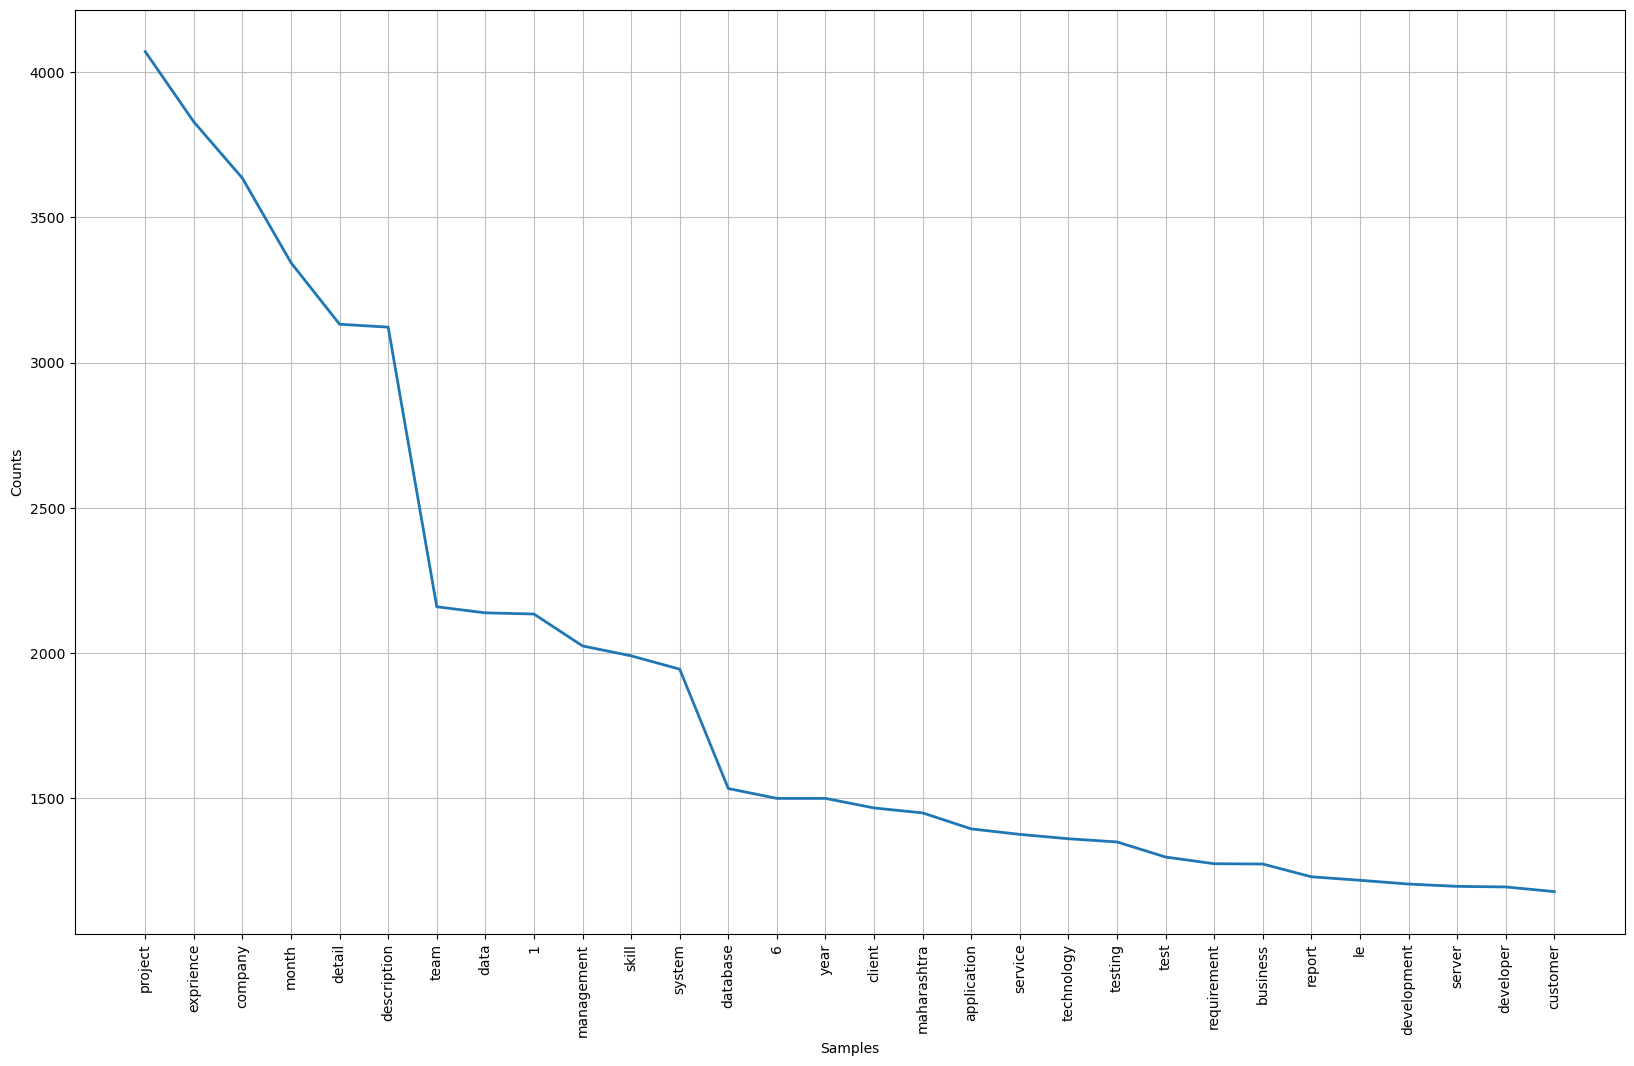

In [60]:
plt.subplots(figsize=(20,12))
freq_dist.plot(30)
plt.show()

In [61]:
len(freq_dist)

6769

In [62]:
common=freq_dist.most_common(40)

In [63]:
common

[('project', 4071),
 ('exprience', 3829),
 ('company', 3635),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('team', 2159),
 ('data', 2138),
 ('1', 2134),
 ('management', 2024),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1466),
 ('maharashtra', 1449),
 ('application', 1394),
 ('service', 1375),
 ('technology', 1360),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026)]

In [64]:
cv=''.join([i for i in lem_words if not i.isdigit()])

In [65]:
ds=df[df["Category"]=="Data Science"]

In [66]:
ds.head()

,Category,Resume,clean_resume
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...


In [67]:
len(ds)

39

In [68]:
ds["clean_resume"]

1     Education Details May 2013 to May 2017 B E UIT...
2     Areas of Interest Deep Learning Control System...
3     Skills R Python SAP HANA Tableau SAP HANA SQL ...
4     Education Details MCA YMCAUST Faridabad Haryan...
5     SKILLS C Basics IOT Python MATLAB Data Science...
6     Skills Python Tableau Data Visualization R Stu...
7     Education Details B Tech Rayat and Bahra Insti...
8     Personal Skills Ability to quickly grasp techn...
9     Expertise Data and Quantitative Analysis Decis...
10    Skills Programming Languages Python pandas num...
11    Education Details May 2013 to May 2017 B E UIT...
12    Areas of Interest Deep Learning Control System...
13    Skills R Python SAP HANA Tableau SAP HANA SQL ...
14    Education Details MCA YMCAUST Faridabad Haryan...
15    SKILLS C Basics IOT Python MATLAB Data Science...
16    Skills Python Tableau Data Visualization R Stu...
17    Education Details B Tech Rayat and Bahra Insti...
18    Personal Skills Ability to quickly grasp t

In [69]:
ds_corpus=" "
for index, row in ds.iterrows():
    ds_corpus += row['clean_resume']

In [70]:
ds_corpus

' Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github c

In [71]:
ds_corpus=ds_corpus.lower()

In [72]:
ds_word=ds_corpus.split()

In [78]:
print('Frequency of "Numpy" is :',ds_word.count("numpy"))

Frequency of "Numpy" is : 23
